In [ ]:
import re
import os
from datetime import datetime

import numpy as np
import fstpy.all as fstpy
import pandas as pd

# ssh spst900@hpnls

# /home/smco503/ssm_old/SSM/ssm_archive_utils/SSM_toLoad/bin/protocole_operation
# /home/smco503/Master_Protocoles/protocole_operation pour trouver le lam.nat.pres
# lam nar.pres /home/smco503/mensuelle/PPP4/bri/
# 2m temperature | TT in hyb coord we have 1.5[m] temperature
# geps reforecast assez vieux 1995 id bno reforeast.model


# Temperature at pressure levels | TT in pres we have 
# [  10,   20,   30,   50,   70,  100,  150,  175,  200,  225,  250,
# 275,  300,  350,  400,  450,  500,  550,  600,  625,  650,  675,
# 700,  725,  750,  775,  800,  825,  850,  875,  900,  925,  950,
# 970,  975,  985, 1000, 1015] in [mb]

# Dew-point Temperature | TD in pres we have
# [  10,   20,   30,   50,   70,  100,  150,  175,  200,  225,  250,
# 275,  300,  350,  400,  450,  500,  550,  600,  625,  650,  675,
# 700,  725,  750,  775,  800,  825,  850,  875,  900,  925,  950,
# 970,  975,  985, 1000, 1015] in [mb]

# 10m Wind Speed | UV  10[m] from hyb new coord from UU and VV kts post-processed

# 10m Wind Direction | WD  10[m] from hyb new coord from UU and VV deg post-processed

# Geopotential 500 mB | GZ 500 [mb]  available in pres

# Mean sea-level Pressure | PN maybe which is Sea level pressure in [mb] available in hyb coord

# Surface Pressure | P0 [mb] in pres

# Total Precipitation | PM maybe Amount of precipitation (ECMWF) [cm], where ?

# Precipitation type | PDM maybe Dominant precipitation type [code] post-processed

# Snowfall Amount | from hyb new
# H_SN    Height of snow level (diagnostic)                                       [code]
# RSN1    Precipitation rate-ice crystals (Milbrandt-Yau)                         [m/s]
# RSN2    Precipitation rate-snow (Milbrandt-Yau)                                 [m/s]
# RSN3    Precipitation rate-graupel (Milbrandt-Yau)                              [m/s]
# RSND    Precipitation rate-solid total snow (Milbrandt-Yau)                     [m/s]
# SN      Snow amount in liquid water equivalent of falling snow.                 [m]
# SN1     Accumulated ice crystals (Milbrandt-Yau)                                [m]
# SN2     Accumulated snow (Milbrandt-Yau)                                        [m]
# SN3     Accumulated graupel (Milbrandt-Yau)                                     [m]
# SND     Total accumulation of unmelted snow (Milbrandt-Yau)                     [m]
# SN      Snow amount in liquid water equivalent of falling snow. [m]
# SND     Total accumulation of unmelted snow (Milbrandt-Yau) [m]

# Precipitable water | maybe EP Precipitable water between eta-1.0 and 0.4 [mm] post-processed


file_dir = '/fs/site5/eccc/prod/ops/mirror/suites/hrdps_national_20211130/n1/gridpt/prog/pres/'

hours = [(0,0),(0,24),(0,48),(6,30),(12,36),(18,42)]

sources = np.unique([f[0:8] for f in os.listdir(file_dir) if re.search(r'[0-9]{10}_[0-9]{3}', f)])

file_list = []

for f in sources:
    for hour in hours:
        file_list.append(f'{f}{hour[0]:02}_{hour[1]:03}')

dataframes = [fstpy.add_grid_column(fstpy.get_basic_dataframe(file_dir + f)) for f in os.listdir(file_dir) if f in file_list]

df = pd.concat(dataframes,ignore_index=True)
df



In [ ]:
import fstd2nc
import xarray as xr
import os
import re
import fstpy.all as fstpy
path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/'
netcdf_path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/netcdf/'
files = [path + f for f in os.listdir(path) if re.search(r'[0-9]{10}_[0-9]{3}', f)]
display(files)
fstd2nc.Buffer(files,vars=['TT'],rpnstd_metadata=True,opdict=True).to_netcdf(netcdf_path + 'all_tt.nc')
# fstd2nc.Buffer(files,vars=['TT'],rpnstd_metadata=True).to_netcdf(netcdf_path + 'all_tt.nc')
display(xr.open_dataset(netcdf_path + 'all_tt.nc'))
fstpy.delete_file(netcdf_path + 'all_tt.nc')

In [ ]:
import fstd2nc
import xarray as xr
import os
import re
import fstpy.all as fstpy
import pandas as pd
import numpy as np
path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/'
netcdf_path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/netcdf/'

files = [path + f for f in os.listdir(path) if re.search(r'[0-9]{10}_[0-9]{3}', f)]

df = fstpy.StandardFileReader(files,query='nomvar=="^^"').to_pandas()
df.drop(columns='d')
pos_y = df.loc[(df.nomvar=='^^') & (df.etiket=='N1_4_2_0X') & (df.ip1==90728)]

original_array = pos_y.iloc[0].d.compute()
pos_y_df = df.loc[(df.nomvar=='^^')]
for i in pos_y_df.index:
    original_array = df.loc[i].d.compute()
    for i in pos_y_df.index:
        print(np.array_equal(pos_y_df.at[i,'d'].compute(),original_array))

# dataframes = [fstpy.add_grid_column(fstpy.get_basic_dataframe(f)) for f in files]
# df = pd.concat(dataframes,ignore_index=True)
# df = fstpy.add_columns(df)
# tt_df = fstpy.select_with_meta(df,['TT'])
# print(tt_df.path.to_string())
# tt_df['etiket'] = 'LAMNATPRE'
# tt_df = fstpy.metadata_cleanup(tt_df)
# cols = fstpy.BASE_COLUMNS 
# if 'd' in cols:
#     cols.remove('d')
# print(tt_df[cols].to_string())

# display(files)
# # fstd2nc.Buffer(files,vars=['TT'],rpnstd_metadata=True,optdict=True).to_netcdf(netcdf_path + 'all_tt.nc')
# fstd2nc.Buffer(files,vars=['TT'],rpnstd_metadata=True).to_netcdf(netcdf_path + 'all_tt.nc')
# display(xr.open_dataset(netcdf_path + 'all_tt.nc'))
# fstpy.delete_file(netcdf_path + 'all_tt.nc')

# Archive netcdf exploration

In [2]:

import xarray as xr
file = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2021121300_.nc'
ds = xr.open_dataset(file)
ds


/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'etas' has multiple fill values {1e+30, '1.e+30f'}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'zos' has multiple fill values {1e+30, '1.e+30f'}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:     (time: 241, lat: 1251, lon: 1801)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-13 ... 2021-12-23
  * lat         (lat) float32 -89.93 -89.78 -89.64 -89.5 ... 89.64 89.78 89.93
  * lon         (lon) float32 5.009e-06 0.2 0.4 0.6 ... 359.4 359.6 359.8 360.0
Data variables:
    etas        (time, lat, lon) float32 ...
    crs_latlon  |S1 ...
    zos         (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.6
    title:          Storm surge model outputs (instantaneous values)
    institution:    Canadian Centre for Meteorological and Environmental Pred...
    contact:        ec.dps-client.ec@canada.ca
    source:         GDSPS/SGPDOT 0, 0
    creation_date:  2021-Dec-13 07:05:41 UTC

In [12]:
import fstd2nc
import xarray as xr
import fstpy.all as fstpy
import numpy as np
file = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/2021010100_000'
fstd2nc.Buffer(file).to_fstpy()

# df = fstpy.StandardFileReader(file).to_pandas()
# df.drop(columns='d')
# ds = fstd2nc.Buffer.from_fstpy(df).to_xarray()

# display(ds)

# np.max(ds.TT_pressure_levels,axis=1).compute().plot()



Found 1 RPN input file(s)
Read(997) !!   X  N1_5_2_0N           3      39     1  000000000        35792     37490         0        0        0  E 64  X  2001     0     0     0
Read(997) !!   X  N1_5_2_0N           3     131     1  000000000        41045     74884         0        0        0  E 64  X  5005     0     0  1600
Read(997) !!   X  N1_5_2_0N           3     131     1  000000000        36424     67921         0        0        0  E 64  X  5005     0     0  1600
Read(997) !!   X  N1_5_2_0N           3      39     1  000000000        35792     37490         0        0        0  E 64  X  2001     0     0     0
Read(997) !!   X  N1_5_2_0N           3     131     1  000000000        41045     74884         0        0        0  E 64  X  5005     0     0  1600
Read(997) !!   X  N1_5_2_0N           3     131     1  000000000        36424     67921         0        0        0  E 64  X  5005     0     0  1600


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,d
0,HU,P,N1_5_2_0N,2540,1290,1,446681600,50,0,0,...,0,134,16,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
1,HU,P,N1_5_2_0N,2540,1290,1,446681600,30,0,0,...,0,134,16,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
2,GZ,P,N1_5_2_0N,2540,1290,1,446681600,1000,0,0,...,0,134,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
3,GZ,P,N1_5_2_0N,2540,1290,1,446681600,985,0,0,...,0,134,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
4,WW,P,N1_5_2_0N,2540,1290,1,446681600,900,0,0,...,0,134,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,PC,P,N1_5_2_0N,2540,1290,1,446681600,0,0,0,...,0,1,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
355,TT,P,N1_5_2_0N,2540,1290,1,446681600,76696048,0,0,...,0,1,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
356,TD,P,N1_5_2_0N,2540,1290,1,446681600,76696048,0,0,...,0,1,12,Z,35792,37490,1,0,446681600,"[[dask.array<getitem, shape=(), dtype=float32,..."
357,!!,X,N1_5_2_0N,3,131,1,0,41045,74884,0,...,0,5,64,X,5005,0,0,1600,0,"[[dask.array<getitem, shape=(), dtype=float64,..."


# Grib2 exploration

In [13]:
import os
import re
import xarray as xr
import numpy as np
import fstpy.all as fstpy
import pandas as pd
path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/'
files = np.sort([path + f for f in os.listdir(path) if re.search(r'[0-9]{10}_[0-9]{3}.grib2', f)])

filters = [
    {'typeOfLevel': 'surface'},
    {'typeOfLevel': 'meanSea'},
    {'typeOfLevel': 'nominalTop'},
    {'typeOfLevel': 'atmosphere'},
    {'typeOfLevel': 'eta'},
    {'stepType': 'instant', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'min', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'max', 'typeOfLevel': 'heightAboveGround'},
    {'typeOfLevel': 'depthBelowLandLayer'},
    {'typeOfLevel': 'isobaricInhPa'},
    {'typeOfLevel': 'isobaricLayer'},
]
dicts = []
for current_file in files:
    for filter in filters:
        # print(filter)
        try:
            ds = xr.open_dataset(current_file, engine="cfgrib",filter_by_keys=filter)
            # display(ds)
            dicts = dicts + [{'file':current_file[-20:],'time':pd.to_datetime(ds.time.data).strftime('%Y:%m:%d-%H:%M:%S'), 'name':ds[i].GRIB_name, 'units':ds[i].GRIB_units, 'type_of_level':ds[i].GRIB_typeOfLevel} for i in ds.data_vars]
        except:
            pass

[fstpy.delete_file(path + f) for f in os.listdir(path) if re.search(r'.*.idx', f)]

df = pd.DataFrame(dicts)
# display(df)
fstpy.delete_file('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database.csv')
df.to_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database.csv', index=False)
fstpy.delete_file('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/unique_variables.csv')
df[['name','units','type_of_level']].drop_duplicates().to_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/unique_variables.csv', index=False)

skipping variable: paramId==156 shortName='gh'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 591, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='eta' value=Variable(dimensions=('eta',), data=array([9850., 9950.])) new_value=Variable(dimensions=(), data=10000.0)
skipping variable: paramId==0 shortName='unknown'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 591, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.Data

In [15]:
pd.read_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database.csv')

,file,time,name,units,type_of_level
0,2017010100_000.grib2,2017:01:01-00:00:00,Sea ice area fraction,(0 - 1),surface
1,2017010100_000.grib2,2017:01:01-00:00:00,Sea surface temperature,K,surface
2,2017010100_000.grib2,2017:01:01-00:00:00,Orography,m,surface
3,2017010100_000.grib2,2017:01:01-00:00:00,Land-sea mask,(0 - 1),surface
4,2017010100_000.grib2,2017:01:01-00:00:00,Surface pressure,Pa,surface
...,...,...,...,...,...
221,2021010100_000.grib2,2021:01:01-00:00:00,V component of wind,m s**-1,isobaricInhPa
222,2021010100_000.grib2,2021:01:01-00:00:00,Wind speed,m s**-1,isobaricInhPa
223,2021010100_000.grib2,2021:01:01-00:00:00,Wind direction,Degree true,isobaricInhPa
224,2021010100_000.grib2,2021:01:01-00:00:00,Specific humidity,kg kg**-1,isobaricInhPa


In [17]:
pd.read_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/unique_variables.csv')

,name,units,type_of_level
0,Sea ice area fraction,(0 - 1),surface
1,Sea surface temperature,K,surface
2,Orography,m,surface
3,Land-sea mask,(0 - 1),surface
4,Surface pressure,Pa,surface
5,Surface solar radiation downwards,J m**-2,surface
6,Net short-wave radiation flux (surface),W m**-2,surface
7,Surface thermal radiation downwards,J m**-2,surface
8,Net long wave radiation flux (surface),W m**-2,surface
9,unknown,unknown,surface


In [40]:
mod_df = pd.read_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database.csv')
mod_df['level'] = None
mod_df.loc[(mod_df.type_of_level=='heightAboveGround') & (mod_df.name == '10 metre U wind component'), 'level'] = '10'
mod_df.loc[(mod_df.type_of_level=='heightAboveGround') & (mod_df.name == '10 metre V wind component'), 'level'] = '10'
mod_df.loc[(mod_df.type_of_level=='heightAboveGround') & (mod_df.name == '10 metre wind speed'), 'level'] = '10'
mod_df.loc[(mod_df.type_of_level=='heightAboveGround') & (mod_df.name == '10 metre wind direction'), 'level'] = '10'

print(mod_df.to_string())

                     file                 time                                     name               units        type_of_level level
0    2017010100_000.grib2  2017:01:01-00:00:00                    Sea ice area fraction             (0 - 1)              surface  None
1    2017010100_000.grib2  2017:01:01-00:00:00                  Sea surface temperature                   K              surface  None
2    2017010100_000.grib2  2017:01:01-00:00:00                                Orography                   m              surface  None
3    2017010100_000.grib2  2017:01:01-00:00:00                            Land-sea mask             (0 - 1)              surface  None
4    2017010100_000.grib2  2017:01:01-00:00:00                         Surface pressure                  Pa              surface  None
5    2017010100_000.grib2  2017:01:01-00:00:00        Surface solar radiation downwards             J m**-2              surface  None
6    2017010100_000.grib2  2017:01:01-00:00:00  Net sho

In [80]:
import os
import re
import xarray as xr
import numpy as np
import fstpy.all as fstpy
import pandas as pd
path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/'
files = np.sort([path + f for f in os.listdir(path) if re.search(r'[0-9]{10}_[0-9]{3}.grib2', f)])

filters = [
    {'typeOfLevel': 'surface'},
    {'typeOfLevel': 'meanSea'},
    {'typeOfLevel': 'nominalTop'},
    {'typeOfLevel': 'atmosphere'},
    {'typeOfLevel': 'eta'},
    {'stepType': 'instant', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'min', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'max', 'typeOfLevel': 'heightAboveGround'},
    {'typeOfLevel': 'depthBelowLandLayer'},
    {'typeOfLevel': 'isobaricInhPa'},
    {'typeOfLevel': 'isobaricLayer'},
]

def get_levels(ds, filter):
    if filter['typeOfLevel'] == 'eta':
        return ','.join(ds.eta.data.astype(str).tolist())
    if filter['typeOfLevel'] == 'isobaricInhPa':
        return ','.join(ds.isobaricInhPa.data.astype(str).tolist())
    return ''


ds = xr.open_dataset(files[0], engine="cfgrib",filter_by_keys=filters[9])
display(ds)
# get_levels(ds,filters[9])


skipping variable: paramId==135 shortName='w'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 591, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1015., 1000.,  985.,  970.,  950.,  925.,  900.,  875.,  850.,
        800.,  750.,  700.,  650.,  600.,  550.,  500.,  450.,  400.,
        350.,  300.,  275.,  250.,  225.,  200.,  175.,  150.,  100.,
         50.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  850.,  700.,  500.,  250.]))
skipping variable: paramId==3041 shortName='absv'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 28, y: 1456, x: 2576)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1.015e+03 1e+03 985.0 ... 100.0 50.0
    latitude       (y, x) float64 ...
    longitude      (y, x) float64 ...
    valid_time     datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    r              (isobaricInhPa, y, x) float32 ...
    t              (isobaricInhPa, y, x) float32 ...
    gh             (isobaricInhPa, y, x) float32 ...
    u              (isobaricInhPa, y, x) float32 ...
    v              (isobaricInhPa, y, x) float32 ...
    ws             (isobaricInhPa, y, x) float32 ...
    wdir           (isobaricInhPa, y, x) float32 ...
    unknown        (isobaricInhPa, y, x) float32 ...
    q              (isobaricInhPa, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    history:                 2022-05-12T19:23 GRIB to CDM+CF via cfgrib-0.9.1...

In [81]:
import os
import re
import xarray as xr
import numpy as np
import fstpy.all as fstpy
import pandas as pd
path = '/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/'
files = np.sort([path + f for f in os.listdir(path) if re.search(r'[0-9]{10}_[0-9]{3}.grib2', f)])

filters = [
    {'typeOfLevel': 'surface'},
    {'typeOfLevel': 'meanSea'},
    {'typeOfLevel': 'nominalTop'},
    {'typeOfLevel': 'atmosphere'},
    {'typeOfLevel': 'eta'},
    {'stepType': 'instant', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'min', 'typeOfLevel': 'heightAboveGround'},
    {'stepType': 'max', 'typeOfLevel': 'heightAboveGround'},
    {'typeOfLevel': 'depthBelowLandLayer'},
    {'typeOfLevel': 'isobaricInhPa'},
    {'typeOfLevel': 'isobaricLayer'},
]


def get_levels(ds, filter):
    if filter['typeOfLevel'] == 'eta':
        return ','.join(ds.eta.data.astype(str).tolist())
    if filter['typeOfLevel'] == 'isobaricInhPa':
        return ','.join(ds.isobaricInhPa.data.astype(str).tolist())
    return ''

dicts = []
for current_file in files:
    for filter in filters:
        # print(filter)
        try:
            ds = xr.open_dataset(current_file, engine="cfgrib",filter_by_keys=filter)
            # display(ds)
            dicts = dicts + [{'file':current_file[-20:],'time':pd.to_datetime(ds.time.data).strftime('%Y:%m:%d-%H:%M:%S'), 'var':i, 'name':ds[i].GRIB_name, 'units':ds[i].GRIB_units, 'type_of_level':ds[i].GRIB_typeOfLevel,'levels':get_levels(ds,filter)} for i in ds.data_vars]
        except:
            pass

[fstpy.delete_file(path + f) for f in os.listdir(path) if re.search(r'.*.idx', f)]

df = pd.DataFrame(dicts)
# display(df)
fstpy.delete_file('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database_with_levels.csv')
df.to_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database_with_levels.csv', index=False)


skipping variable: paramId==156 shortName='gh'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 591, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='eta' value=Variable(dimensions=('eta',), data=array([9850., 9950.])) new_value=Variable(dimensions=(), data=10000.0)
skipping variable: paramId==0 shortName='unknown'
Traceback (most recent call last):
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 660, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/cfgrib/dataset.py", line 591, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.Data

In [82]:
pd.set_option('display.max_rows', 500)
df = pd.read_csv('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/database_with_levels.csv')
df

,file,time,var,name,units,type_of_level,levels
0,2017010100_000.grib2,2017:01:01-00:00:00,siconc,Sea ice area fraction,(0 - 1),surface,NaN
1,2017010100_000.grib2,2017:01:01-00:00:00,sst,Sea surface temperature,K,surface,NaN
2,2017010100_000.grib2,2017:01:01-00:00:00,orog,Orography,m,surface,NaN
3,2017010100_000.grib2,2017:01:01-00:00:00,lsm,Land-sea mask,(0 - 1),surface,NaN
4,2017010100_000.grib2,2017:01:01-00:00:00,sp,Surface pressure,Pa,surface,NaN
5,2017010100_000.grib2,2017:01:01-00:00:00,ssrd,Surface solar radiation downwards,J m**-2,surface,NaN
6,2017010100_000.grib2,2017:01:01-00:00:00,nswrs,Net short-wave radiation flux (surface),W m**-2,surface,NaN
7,2017010100_000.grib2,2017:01:01-00:00:00,strd,Surface thermal radiation downwards,J m**-2,surface,NaN
8,2017010100_000.grib2,2017:01:01-00:00:00,nlwrs,Net long wave radiation flux (surface),W m**-2,surface,NaN
9,2017010100_000.grib2,2017:01:01-00:00:00,unknown,unknown,unknown,surface,NaN


In [74]:
import xarray as xr
from cfgrib import xarray_store
from cfgrib import xarray_to_grib
import cfgrib
display(cfgrib.__version__)
# dst = xarray_store.open_dataset("/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/2019010100_000.grib2")
ds = xr.open_dataset("/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lamgrib2.hrdps_national.continental/2019010100_000.grib2")
ds

# cfgrib.to_grib(ds, 'User_Guide_Example_Data_from_cfgrib.grib')#, grib_keys={'centre': 'ecmf'})

'0.9.10.1'

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'stepType': 'instant'}
    filter_by_keys={'stepType': 'accum'}
    filter_by_keys={'stepType': 'min'}
    filter_by_keys={'stepType': 'max'}

In [ ]:
# #!/bin/bash

# #for i in `env | grep CMC | sed 's/=.*//'` ; do unset $i; done


# cat << EOT > dirrarc_arch
# target = /home/sbf000/ss6
# filter = copy
# postprocess = nopost
# date = 2021,01,01,2021,04,01
# branche = operation.forecasts.lam.nat.pres
# ext = ***
# heure = 12
# priority = online
# inc = 1
# EOT

# . ssmuse-sh -d /fs/ssm/eccc/cmo/cmoi/apps/archive/rarc/20220506
# # echo rarc -i dirrarc
#  rarc -i dirrarc_umos > umos_log 2>&1

# i=0
# j=0
# while [ -z $(cat umos_log | grep "(100 %" ) ]
# do
#   echo "in i loop $i, file not complete"
#   rarc -i dirrarc_umos > umos_log${ext} 2>&1
#   ((j++))
#   if [[ "$j" == '40' ]]; then
#     break
#   fi
# done

# lam.nat.pres archive contents for the last 5 years

In [ ]:
#lam nat pres archive
import numpy as np
import os
import re
import pandas as pd


# 5 year period
# 2017-01-01@2021-01-01


file_dir = '/home/smco503/mensuelle/PPP5/bri/'


# find all files in the bri dir
sources = np.unique([file_dir + f for f in os.listdir(file_dir) if re.search(r'[0-9]{6}$', f)])

# display(sources)

# read all the files in the bri dir
data = []
for f in sources:
    with open(f,'r') as fp:
        data = data + fp.readlines()
    
# get the file names from the all the read files
available_files = [re.sub('(.*?) bri.*\n', r'\1', l) for l in data]

# display('available files')
# display(available_files)
# display(f'{len(available_files)} available files in archive')

# filter files on those hours
filtered_files = [f for f in available_files if f[11:14] in ['000','024','030','036','042','048']]

# display('filtered files')
# display(filtered_files)
display(f'{len(filtered_files)} available filtered files')

# find the unique dates
unique_dates = np.sort(np.unique([f'{f[0:8]}' for f in filtered_files]))

# create a date_string for directives
unique_dates_str = [f'{d[0:4]},{d[4:6]},{d[6:8]},{d[0:4]},{d[4:6]},{d[6:8]}' for d in unique_dates]
# display('unique dates')
# display(unique_dates)


# create a dataframe of directives
df = pd.DataFrame(
    {
        'target':np.full_like(unique_dates,'/home/sbf000/ss6',dtype='<U16'), 
        'filter':np.full_like(unique_dates,'/home/sbf000/src/rarc/filter.sh', dtype='<U31') , 
        'postprocess':np.full_like(unique_dates,'nopost',dtype='<U6'), 
        'date':unique_dates_str,
        'branche':np.full_like(unique_dates,'operation.forecasts.lam.nat.pres',dtype='<U32'),
        'ext':np.full_like(unique_dates,np.nan), 
        'heure':np.full_like(unique_dates,np.nan), 
        'priority':np.full_like(unique_dates,'online',dtype='<U6'),
        'inc':np.full_like(unique_dates,'1',dtype='<U1'),
        'inc':np.full_like(unique_dates,'#',dtype='<U1'),
        'real_date':unique_dates,
    })

# convert date string to real datetime object for searching
df['search_date'] = pd.to_datetime(df['real_date'])

# fill the ext and heure columns of the dataframe
for d in unique_dates:
    df.loc[df.real_date==d,'ext'] = ','.join(np.sort(np.unique([f'{f[11:]}' for f in filtered_files if f[0:8] == d])).tolist())
    df.loc[df.real_date==d,'heure'] = ','.join(np.sort(np.unique([f'{f[8:10]}' for f in filtered_files if f[0:8] == d])).tolist())

# remove_real_date column    
df.drop(columns='real_date',inplace=True)

# create a 5 year date mask
mask = (df['search_date'] > '2017-1-1') & (df['search_date'] <= '2021-1-1')

# create a dataframe for that 5 year period
reduced_df = df.loc[mask].drop(columns='search_date')

len(reduced_df)

reduced_df
mydict = df_reduced.iloc[0].to_dict()

for k,v in mydict.items():
    print(f'{k} = {v}')


# Create a database of archives

In [3]:
import pandas as pd
index = '/home/smco503/Master_Protocoles/protocole_operation'
with open(index,'r') as fp:
    lines = fp.readlines()

hall = 'PPP5'
operation_database = pd.DataFrame([{'directory':f"{l.split()[7].replace('${archiveHall}',hall).strip()}/{l.split()[0].replace('&','').strip()}/",'id':l.split()[0].replace('&','').strip(), 'tree':l.split()[4].strip(), 'branch':l.split()[5].strip()} for l in  lines if (l.split()[0][0] != '#') and (len(l.split())>=7)])
operation_database.sort_values('tree')

,directory,id,tree,branch
249,/home/smco503/mensuelle/PPP5/aot/,aot,AetP,GFX
1010,/home/smco503/mensuelle/PPP5/bty/,bty,alerts,EC.CAPcp
1668,/home/smco503/mensuelle/PPP5/cvr/,cvr,analyse,shop.SHOPPARC.products
1667,/home/smco503/mensuelle/PPP5/cvq/,cvq,analyse,shop.SHOPPARC.outputs
1666,/home/smco503/mensuelle/PPP5/cvp/,cvp,analyse,shop.SHOPPARC.inputs
...,...,...,...,...
312,/home/smco503/mensuelle/PPP5/ark/,ark,verif,glbwam.verif.graph
2119,/home/smco503/mensuelle/PPP5/vab/,vab,verif,qpf.historic.files
1295,/home/smco503/mensuelle/PPP5/cgg/,cgg,watroute,verif.prog.hydrol
1294,/home/smco503/mensuelle/PPP5/cgf/,cgf,watroute,verif.anal.hydrol


# Get the available files for each archive

In [6]:
import pandas as pd
import numpy as np
import os
import re
files_df = pd.DataFrame({'directory':operation_database.directory})
files_df['files'] = None
for directory in operation_database.directory:
    sources = np.unique([directory + f for f in os.listdir(directory) if re.search(r'[0-9]{6}$', f) and (f[0] != '.')])
    data = []
    for f in sources:
        with open(f,'r') as fp:
            data = data + fp.readlines()
        
    # get the file names from the all the read files
    files_df.loc[files_df.directory == directory,'files'] = ','.join([l.split()[0].strip() for l in data])

files_df

,directory,files
0,/home/smco503/mensuelle/PPP5/aaa/,"2018090600_006,2018090600_012,2018090600_018,2..."
1,/home/smco503/mensuelle/PPP5/aab/,"2020073112_-060m_iau,2020073112_-120m_iau,2020..."
2,/home/smco503/mensuelle/PPP5/aba/,
3,/home/smco503/mensuelle/PPP5/abb/,
4,/home/smco503/mensuelle/PPP5/abc/,"1900010100_archive_padding_file,2019061312_ai,..."
...,...,...
2115,/home/smco503/mensuelle/PPP5/sav/,"2018040100_00g15,2018040101_00g15,2018040102_0..."
2116,/home/smco503/mensuelle/PPP5/szy/,
2117,/home/smco503/mensuelle/PPP5/szz/,"2018040100_00g15,2018040101_00g15,2018040102_0..."
2118,/home/smco503/mensuelle/PPP5/vaa/,"1987050100_cmc,1987060100_cmc,1987070100_cmc,1..."


# Cleanup database

In [7]:
# remove entries without files
files_df = files_df.loc[files_df.files != '']

# Complete the operations archive

In [8]:
# merge dataframes
operation_database = operation_database.merge(files_df, how='outer', left_on='directory', right_on='directory')
# remove entries without files
operation_database = operation_database.loc[~operation_database.files.isna()]
operation_database

,directory,id,tree,branch,files
0,/home/smco503/mensuelle/PPP5/aaa/,aaa,forecasts,reghyb2,"2018090600_006,2018090600_012,2018090600_018,2..."
1,/home/smco503/mensuelle/PPP5/aab/,aab,trials,reghyb2.iau,"2020073112_-060m_iau,2020073112_-120m_iau,2020..."
4,/home/smco503/mensuelle/PPP5/abc/,abc,observations,banco.postalt.e1,"1900010100_archive_padding_file,2019061312_ai,..."
5,/home/smco503/mensuelle/PPP5/abd/,abd,observations,banco.postalt.e2,"1900010100_archive_padding_file,2019061606_ai,..."
6,/home/smco503/mensuelle/PPP5/abe/,abe,analyses,lam.arctic.model,"2011092000_000_15km,2011092000_001_15km,201109..."
...,...,...,...,...,...
2112,/home/smco503/mensuelle/PPP5/eeb/,eeb,observations,rawdata.remote.tovs1b.amsua,"2001051400_,2001051406_,2001051412_,2001051418..."
2115,/home/smco503/mensuelle/PPP5/sav/,sav,satellites,goesw.raw.imager.allbands,"2018040100_00g15,2018040101_00g15,2018040102_0..."
2117,/home/smco503/mensuelle/PPP5/szz/,szz,satellites,goesw.raw.imager.vis1km,"2018040100_00g15,2018040101_00g15,2018040102_0..."
2118,/home/smco503/mensuelle/PPP5/vaa/,vaa,verif,csv.historic.files,"1987050100_cmc,1987060100_cmc,1987070100_cmc,1..."


# Get the operation grib archives

In [9]:
grib_df = operation_database.loc[operation_database.branch.str.contains('grib')]
grib_df

,directory,id,tree,branch,files
30,/home/smco503/mensuelle/PPP5/acj/,acj,forecasts,lamgrib2.arctic,"2012100106_000.grib2,2012100106_001.grib2,2012..."
31,/home/smco503/mensuelle/PPP5/ack/,ack,forecasts,lamgrib2.east,"2012100112_000.grib2,2012100112_001.grib2,2012..."
32,/home/smco503/mensuelle/PPP5/acl/,acl,forecasts,lamgrib2.west,"2012100112_000.grib2,2012100112_001.grib2,2012..."
44,/home/smco503/mensuelle/PPP5/adb/,adb,forecasts,lamgrib2.lancaster,"2012100106_000.grib2,2012100106_001.grib2,2012..."
45,/home/smco503/mensuelle/PPP5/adc/,adc,forecasts,lamgrib2.maritimes,"2012100106_000.grib2,2012100106_001.grib2,2012..."
116,/home/smco503/mensuelle/PPP5/ahi/,ahi,forecasts,reggrib,"2021112812_000_diag,2021112812_000_hi,20211128..."
181,/home/smco503/mensuelle/PPP5/akp/,akp,ncep,grib,"2011072012_cdas.t12z.pgrbf00,2011072012_cdas.t..."
382,/home/smco503/mensuelle/PPP5/aug/,aug,naefs,ensemble.grib2,2020030100_CMC_naefs_hr_latlon0p5x0p5_000_prog...
689,/home/smco503/mensuelle/PPP5/bgt/,bgt,outgoing,grib2.gsl,2015040100_CMC_coupled-rdps-stlawrence-atmosph...
717,/home/smco503/mensuelle/PPP5/bhz/,bhz,outgoing,grib2.ninjo.glb,"2018040100_000_grib2_glbhi,2018040100_003_grib..."


In [16]:
grib_df['date_start'] = None
grib_df['date_end'] = None
for i in grib_df.index:
    file_list = grib_df.at[i,'files'].split(',')
    dates = np.sort([f[0:8] for f in file_list])
    grib_df.at[i,'date_start'] = pd.to_datetime(dates[0])
    grib_df.at[i,'date_end'] = pd.to_datetime(dates[-1])

grib_df = grib_df.drop(columns='files')
grib_df

/tmp/sbf000/678239/ipykernel_64503/1219074607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grib_df['date_start'] = None
/tmp/sbf000/678239/ipykernel_64503/1219074607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grib_df['date_end'] = None


,directory,id,tree,branch,date_start,date_end
30,/home/smco503/mensuelle/PPP5/acj/,acj,forecasts,lamgrib2.arctic,2012-10-01 00:00:00,2012-10-03 00:00:00
31,/home/smco503/mensuelle/PPP5/ack/,ack,forecasts,lamgrib2.east,2012-10-01 00:00:00,2012-10-03 00:00:00
32,/home/smco503/mensuelle/PPP5/acl/,acl,forecasts,lamgrib2.west,2012-10-01 00:00:00,2014-06-08 00:00:00
44,/home/smco503/mensuelle/PPP5/adb/,adb,forecasts,lamgrib2.lancaster,2012-10-01 00:00:00,2012-10-03 00:00:00
45,/home/smco503/mensuelle/PPP5/adc/,adc,forecasts,lamgrib2.maritimes,2012-10-01 00:00:00,2012-10-03 00:00:00
116,/home/smco503/mensuelle/PPP5/ahi/,ahi,forecasts,reggrib,2021-11-28 00:00:00,2022-05-13 00:00:00
181,/home/smco503/mensuelle/PPP5/akp/,akp,ncep,grib,2011-07-20 00:00:00,2018-08-22 00:00:00
382,/home/smco503/mensuelle/PPP5/aug/,aug,naefs,ensemble.grib2,2020-03-01 00:00:00,2022-05-13 00:00:00
689,/home/smco503/mensuelle/PPP5/bgt/,bgt,outgoing,grib2.gsl,2015-04-01 00:00:00,2021-12-01 00:00:00
717,/home/smco503/mensuelle/PPP5/bhz/,bhz,outgoing,grib2.ninjo.glb,2018-04-01 00:00:00,2020-07-28 00:00:00


In [17]:
grib_df.to_csv('/fs/site6/eccc/cmd/w/sbf000/grib_database.csv', index=False)

In [18]:
df = pd.read_csv('/fs/site6/eccc/cmd/w/sbf000/grib_database.csv')
df

,directory,id,tree,branch,date_start,date_end
0,/home/smco503/mensuelle/PPP5/acj/,acj,forecasts,lamgrib2.arctic,2012-10-01 00:00:00,2012-10-03 00:00:00
1,/home/smco503/mensuelle/PPP5/ack/,ack,forecasts,lamgrib2.east,2012-10-01 00:00:00,2012-10-03 00:00:00
2,/home/smco503/mensuelle/PPP5/acl/,acl,forecasts,lamgrib2.west,2012-10-01 00:00:00,2014-06-08 00:00:00
3,/home/smco503/mensuelle/PPP5/adb/,adb,forecasts,lamgrib2.lancaster,2012-10-01 00:00:00,2012-10-03 00:00:00
4,/home/smco503/mensuelle/PPP5/adc/,adc,forecasts,lamgrib2.maritimes,2012-10-01 00:00:00,2012-10-03 00:00:00
5,/home/smco503/mensuelle/PPP5/ahi/,ahi,forecasts,reggrib,2021-11-28 00:00:00,2022-05-13 00:00:00
6,/home/smco503/mensuelle/PPP5/akp/,akp,ncep,grib,2011-07-20 00:00:00,2018-08-22 00:00:00
7,/home/smco503/mensuelle/PPP5/aug/,aug,naefs,ensemble.grib2,2020-03-01 00:00:00,2022-05-13 00:00:00
8,/home/smco503/mensuelle/PPP5/bgt/,bgt,outgoing,grib2.gsl,2015-04-01 00:00:00,2021-12-01 00:00:00
9,/home/smco503/mensuelle/PPP5/bhz/,bhz,outgoing,grib2.ninjo.glb,2018-04-01 00:00:00,2020-07-28 00:00:00


In [22]:
operation_database.loc[operation_database.branch.str.contains('geps')]

,directory,id,tree,branch,files
359,/home/smco503/mensuelle/PPP5/ath/,ath,ensemble,geps_omf,"2009050400_omf_cmc,2009050400_omf_ncep,2009050..."
666,/home/smco503/mensuelle/PPP5/bfr/,bfr,ensemble,geps_omf_sfc,"2011071312_omf_cmc,2011071312_omf_cmcpar,20110..."
1257,/home/smco503/mensuelle/PPP5/ceu/,ceu,forecasts,scribe.meteocode.geps_moy,"2016102412_meteocode.tar,2016102500_meteocode...."
1264,/home/smco503/mensuelle/PPP5/cfb/,cfb,forecasts,scribe.mat.allonge.geps_moy,"2016102412_matrice.tar,2016102500_matrice.tar,..."
1593,/home/smco503/mensuelle/PPP5/cst/,cst,scribeMat,burp.ens_glb.geps,"2019072300_fstd,2019072300_matrice,2019072300_..."


In [23]:
import fstd2nc
import xarray as xr
import fstpy.all as fstpy
# df = fstpy.StandardFileReader('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/2021010100_000',decode_metadata=True).to_pandas()
# display(df.drop(columns='d'))
# df.columns
ds = fstd2nc.Buffer('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/2021010100_000',vars=['TT'],rpnstd_metadata=True,opdict=True).to_xarray()
# ds.TT_pressure_levels.sel({'pres':10}).plot(size=20)
# ds.TT_pressure_levels
# for l in ds.pres:
#     ds.TT_pressure_levels.sel({'pres':l.data.tolist()}).to_netcdf(f'/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.lam.nat.pres/netcdf/2021010100_000_TT_{l.data.tolist()}.nc')
#     break
# df.loc[df.nomvar=='TT'].drop(columns='d')
# fstpy.select_with_meta(df,['TT'])
# fstpy.get_2d_lat_lon_df(fstpy.select_with_meta(df,['TT'])).iloc[0].d

Found 1 RPN input file(s)
Will look for variables: TT
Read(992) !!   X  N1_5_2_0N           3      39     1  000000000        35792     37490         0        0        0  E 64  X  2001     0     0     0
Read(992) !!   X  N1_5_2_0N           3     131     1  000000000        41045     74884         0        0        0  E 64  X  5005     0     0  1600
Read(992) !!   X  N1_5_2_0N           3     131     1  000000000        36424     67921         0        0        0  E 64  X  5005     0     0  1600
Read(992) !!   X  N1_5_2_0N           3      39     1  000000000        35792     37490         0        0        0  E 64  X  2001     0     0     0
Read(992) !!   X  N1_5_2_0N           3     131     1  000000000        41045     74884         0        0        0  E 64  X  5005     0     0  1600
Read(992) !!   X  N1_5_2_0N           3     131     1  000000000        36424     67921         0        0        0  E 64  X  5005     0     0  1600
Read(992) !!   X  N1_5_2_0N           3      39     

In [71]:
# import netCDF4 as nc
# ds = nc.Dataset('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2022051100_.nc')
# # ds
# # for dim in ds.dimensions.values():
# #     print(dim)

# # for var in ds.variables.values():
# #     print(var)

# a = ds['etas'][0,:,:]
import xarray as xr
import datetime
ds = xr.open_dataset('/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2021121300_.nc',mask_and_scale=True)
display(ds)
date = ds.time.values[0].astype('datetime64[s]').astype(datetime.datetime)
date_str = date.strftime('%Y%m%dT%H%M%SZ')
date_str
# for l in ds.time:

# date = f'{l.data.astype(str).tolist()[0:4]}{l.data.astype(str).tolist()[5:7]}{l.data.astype(str).tolist()[8:10]}'
# display(date)
# # display(f'/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2022051100_etas_{date}.nc')
da = ds.etas.sel(time = date)
del da['time']
display(da)
# data=<NA>, coords=None, dims=None, name=None, attrs=None, indexes=None, fastpath=False
lat = xr.DataArray(da['lat'])
# display(lat.values.shape)
lon = xr.DataArray(da['lon'])
# display(lon.values.shape)
etas_arr = da.values

etas  = xr.DataArray(
    name='etas',
    data=etas_arr,
    dims=["lat", "lon"],
    coords=dict(
        lon= lon,
        lat= lat,
    ),
    attrs=da.attrs,
    )
# etas = xr.DataArray(data = etas, dims=[lat,lon],attrs={'name':'ETAS','units':'m'})
# etas
# })
display(etas)
nds = xr.Dataset(
    data_vars=dict(
        etas=etas,
    ),
    coords=dict(
        lat= lat,
        lon= lon,
        
    ),
    # attrs=dict(description="Weather related data."),
)
display(nds)
# nda = xr.Dataset(
#     name='etas',
#     data=etas,
#     dims=["lat", "lon"],
#     coords=dict(
#         lon= lon,
#         lat= lat,
#     ),
#     attrs=dict(
#         nomvar ="ETAS",
#         units="m",
#     ),
# )
# nda
nnds = etas.to_dataset(name='etas')
nnds.to_netcdf(f'/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2021121300_etas_{date_str}.nc')
xr.open_dataset(f'/fs/site6/eccc/cmd/w/sbf000/operation.forecasts.gdsps.netcdf/2021121300_etas_{date_str}.nc')


/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'etas' has multiple fill values {1e+30, '1.e+30f'}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'zos' has multiple fill values {1e+30, '1.e+30f'}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:     (time: 241, lat: 1251, lon: 1801)
Coordinates:
  * time        (time) datetime64[ns] 2021-12-13 ... 2021-12-23
  * lat         (lat) float32 -89.93 -89.78 -89.64 -89.5 ... 89.64 89.78 89.93
  * lon         (lon) float32 5.009e-06 0.2 0.4 0.6 ... 359.4 359.6 359.8 360.0
Data variables:
    etas        (time, lat, lon) float32 ...
    crs_latlon  |S1 ...
    zos         (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.6
    title:          Storm surge model outputs (instantaneous values)
    institution:    Canadian Centre for Meteorological and Environmental Pred...
    contact:        ec.dps-client.ec@canada.ca
    source:         GDSPS/SGPDOT 0, 0
    creation_date:  2021-Dec-13 07:05:41 UTC

<xarray.DataArray 'etas' (lat: 1251, lon: 1801)>
[2253051 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.93 -89.78 -89.64 -89.5 ... 89.5 89.64 89.78 89.93
  * lon      (lon) float32 5.009e-06 0.2 0.4 0.6 0.8 ... 359.4 359.6 359.8 360.0
Attributes:
    nomvar:             ETAS
    long_name:          Storm surge
    definition_opdict:  
    units:              m
    grid_mapping:       crs_latlon
    stdscale:           1.f
    stdoffset:          0.f
    standard_name:      non_tidal_elevation_of_sea_surface_height

/home/sbf000/miniconda3/envs/py39/lib/python3.9/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.DataArray 'etas' (lat: 1251, lon: 1801)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 5.009e-06 0.2 0.4 0.6 0.8 ... 359.4 359.6 359.8 360.0
  * lat      (lat) float32 -89.93 -89.78 -89.64 -89.5 ... 89.5 89.64 89.78 89.93
Attributes:
    nomvar:             ETAS
    long_name:          Storm surge
    definition_opdict:  
    units:              m
    grid_mapping:       crs_latlon
    stdscale:           1.f
    stdoffset:          0.f
    standard_name:      non_tidal_elevation_of_sea_surface_height

<xarray.Dataset>
Dimensions:  (lon: 1801, lat: 1251)
Coordinates:
  * lon      (lon) float32 5.009e-06 0.2 0.4 0.6 0.8 ... 359.4 359.6 359.8 360.0
  * lat      (lat) float32 -89.93 -89.78 -89.64 -89.5 ... 89.5 89.64 89.78 89.93
Data variables:
    etas     (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

<xarray.Dataset>
Dimensions:                        (lon: 1801, lat: 1251)
Coordinates:
  * lon                            (lon) float32 5.009e-06 0.2 ... 359.8 360.0
  * lat                            (lat) float32 -89.93 -89.78 ... 89.78 89.93
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float32 ...

In [ ]:
# get a list of files for lam.nat.pres
(operation_database.loc[operation_database.branch == 'lam.nat.pres'].files).iloc[0].split(',')

In [ ]:
# get the unique dates
# dates = np.sort(np.unique([f'{f[0:4]},{f[4:6]},{f[6:8]},{f[0:4]},{f[4:6]},{f[6:8]}' for f in filtered_files]))
# display(dates)

# hours = ','.join(np.sort(np.unique([f[8:10] for f in filtered_files])).tolist())
# display(hours)

# extensions = ','.join(np.sort(np.unique([f[11:] for f in filtered_files])).tolist())
# display(extensions)
# sources = [f[0:8] for f in available_files]

# generated_files = []
# for f in sources:
#     for hour in hours:
#         generated_files.append(f'{f}{hour[0]:02}_{hour[1]:03}_2.5km')

# # display(generated_files)
# display(f'{len(generated_files)} generated files from available files')
# selected_files = list(set(available_files).intersection(set(generated_files)))
# display(f'{len(list(selected_files))} matching files')
# selected_files = np.sort(selected_files)
# selected_files

# filter = 'editfst -s $1 -d $2 -i /home/sbf000/bin/rarc_MIDAS/rdps4midasall.directives'

# edit_fst_directives = "desire(-1,['>>','^^','!!'])\ndesire(-1,['P0','PT','UU','VV','GZ'],-1,-1,-1,-1,-1)\ndesire(-1,['TG','P0','GZ'],-1,-1,-1,-1,-1)"

# rarc_directives = {
#     'target':'/home/sbf000/ss6',
#     'filter':'/home/sbf000/src/rarc/filter.sh',
#     'postprocess':'nopost',
#     'date':'2015,04,01,2015,04,01',
#     'branche':'operation.forecasts.lam.nat.pres',
#     'ext':'000_2.5km,024_2.5km,030_2.5km,036_2.5km,042_2.5km,048_2.5km',
#     'heure':'00,06,12,18',
#     'priority':'online',
#     'inc':'1',
# }
# # np.sort(np.unique([f'date={f[0:4]},{f[4:6]},{f[6:8]},{f[0:4]},{f[4:6]},{f[6:8]}' for f in selected_files]))[-1]

In [34]:
cap = 48
jump = 1
ext = []
for i in [0,6,12,18]:
    sum = i
    # print(sum)

    while (sum <= cap) :#and ((sum//24)>1):
        if sum == 0:
            ext.append(f'{i:02}_{sum:03}')
        elif sum != i:
            ext.append(f'{i:02}_{sum:03}')
        sum = sum + jump
print(len(ext))
ext

157


['00_000',
 '00_001',
 '00_002',
 '00_003',
 '00_004',
 '00_005',
 '00_006',
 '00_007',
 '00_008',
 '00_009',
 '00_010',
 '00_011',
 '00_012',
 '00_013',
 '00_014',
 '00_015',
 '00_016',
 '00_017',
 '00_018',
 '00_019',
 '00_020',
 '00_021',
 '00_022',
 '00_023',
 '00_024',
 '00_025',
 '00_026',
 '00_027',
 '00_028',
 '00_029',
 '00_030',
 '00_031',
 '00_032',
 '00_033',
 '00_034',
 '00_035',
 '00_036',
 '00_037',
 '00_038',
 '00_039',
 '00_040',
 '00_041',
 '00_042',
 '00_043',
 '00_044',
 '00_045',
 '00_046',
 '00_047',
 '00_048',
 '06_007',
 '06_008',
 '06_009',
 '06_010',
 '06_011',
 '06_012',
 '06_013',
 '06_014',
 '06_015',
 '06_016',
 '06_017',
 '06_018',
 '06_019',
 '06_020',
 '06_021',
 '06_022',
 '06_023',
 '06_024',
 '06_025',
 '06_026',
 '06_027',
 '06_028',
 '06_029',
 '06_030',
 '06_031',
 '06_032',
 '06_033',
 '06_034',
 '06_035',
 '06_036',
 '06_037',
 '06_038',
 '06_039',
 '06_040',
 '06_041',
 '06_042',
 '06_043',
 '06_044',
 '06_045',
 '06_046',
 '06_047',
 '06_048',

<AxesSubplot:xlabel='period'>

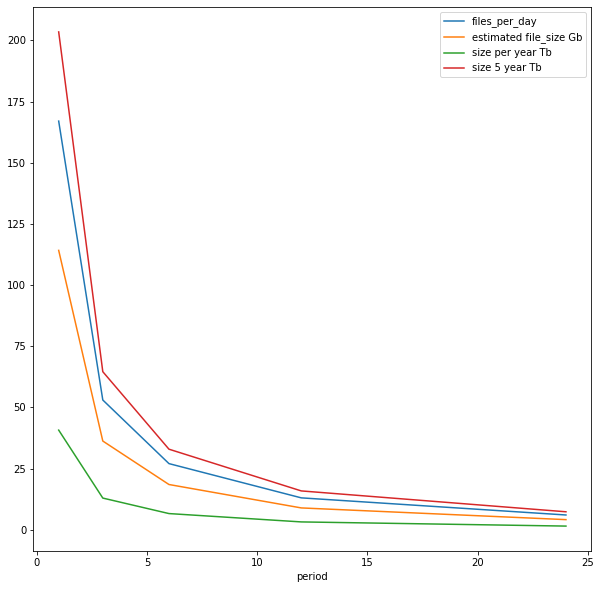

In [83]:
#700mb size avg
#24h = 6 per day
#12h = 13 per day
#6h = 27 per day
#3h = 53 per day
#1h = 157
import pandas as pd
df = pd.DataFrame({'period':[24,12,6,3,1][::-1],'files_per_day':[6,13,27,53,167][::-1],'estimated file_size Gb':[(x*700)/1024 for x in [6,13,27,53,167][::-1]],'size per year Tb':[(((x*700)/1024)*365)/1024 for x in [6,13,27,53,167][::-1]],'size 5 year Tb':[((((x*700)/1024)*365)/1024)*5 for x in [6,13,27,53,167][::-1]]})
# df.set_index(df.period).plot()
df.set_index(df.period).drop(columns=['period']).plot(figsize=(10,10),kind='line')#,subplots=True)

190